In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now=datetime.now()
start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-24,29.095127,29.173293,28.860632,29.142027,178103600
2015-04-27,29.624407,29.731607,29.289415,29.548476,387816800
2015-04-28,29.157656,30.046499,28.936564,30.028636,475696000
2015-04-29,28.728868,29.387684,28.652938,29.068327,253544400
2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600


In [4]:
columns=df.columns
columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-24,29.095127,29.173293,28.860632,29.142027,178103600
2015-04-27,29.624407,29.731607,29.289415,29.548476,387816800
2015-04-28,29.157656,30.046499,28.936564,30.028636,475696000
2015-04-29,28.728868,29.387684,28.652938,29.068327,253544400
2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52976400
2025-04-23,204.600006,208.000000,202.800003,206.000000,52863100


# 2. Data Exploration and Visualization

In [7]:
df.shape

(2515, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-04-24 to 2025-04-23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2515 non-null   float64
 1   (High, AAPL)    2515 non-null   float64
 2   (Low, AAPL)     2515 non-null   float64
 3   (Open, AAPL)    2515 non-null   float64
 4   (Volume, AAPL)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,100.170290,101.176193,99.057086,100.073556,1.123192e+08
std,68.288409,68.961269,67.525321,68.207857,6.555231e+07
min,20.674532,20.978906,20.475431,20.596722,2.323470e+07
25%,37.171305,37.543761,36.772729,37.165096,6.872600e+07
50%,76.737419,77.386249,75.931199,76.658120,9.642760e+07
75%,159.159973,160.935135,156.881397,158.787478,1.366721e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [10]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [11]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [12]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-24,29.095127,29.173293,28.860632,29.142027,178103600
1,2015-04-27,29.624407,29.731607,29.289415,29.548476,387816800
2,2015-04-28,29.157656,30.046499,28.936564,30.028636,475696000
3,2015-04-29,28.728868,29.387684,28.652938,29.068327,253544400
4,2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600


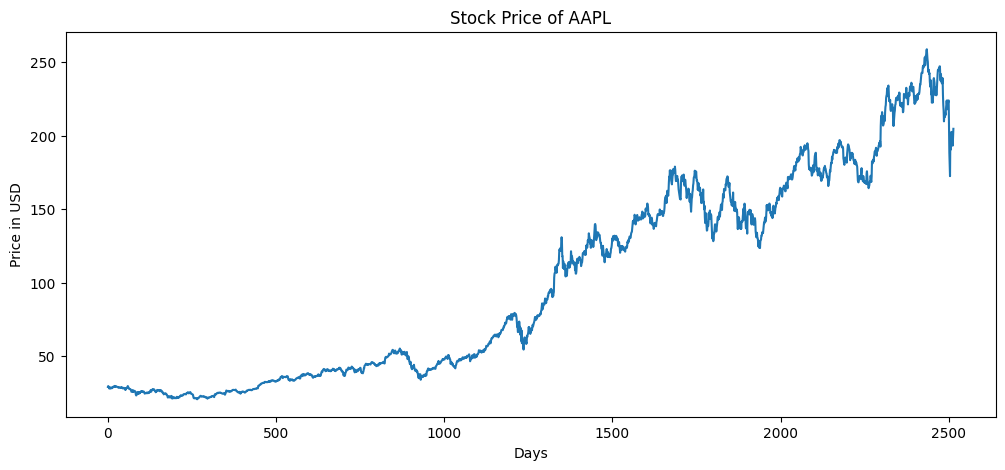

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title(f'Stock Price of {ticker}')
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.show()

# 3. Feature Engineering

### 100 Days Moving Average

In [14]:
df['MA_100']=df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-24,29.095127,29.173293,28.860632,29.142027,178103600,NaN
1,2015-04-27,29.624407,29.731607,29.289415,29.548476,387816800,NaN
2,2015-04-28,29.157656,30.046499,28.936564,30.028636,475696000,NaN
3,2015-04-29,28.728868,29.387684,28.652938,29.068327,253544400,NaN
4,2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600,NaN
...,...,...,...,...,...,...,...
98,2015-09-14,25.976530,26.332466,25.875157,26.262631,233453600,NaN
99,2015-09-15,26.195047,26.251366,25.776035,26.116201,173364800,27.590607
100,2015-09-16,26.224337,26.253622,26.005819,26.188292,148694000,27.561899


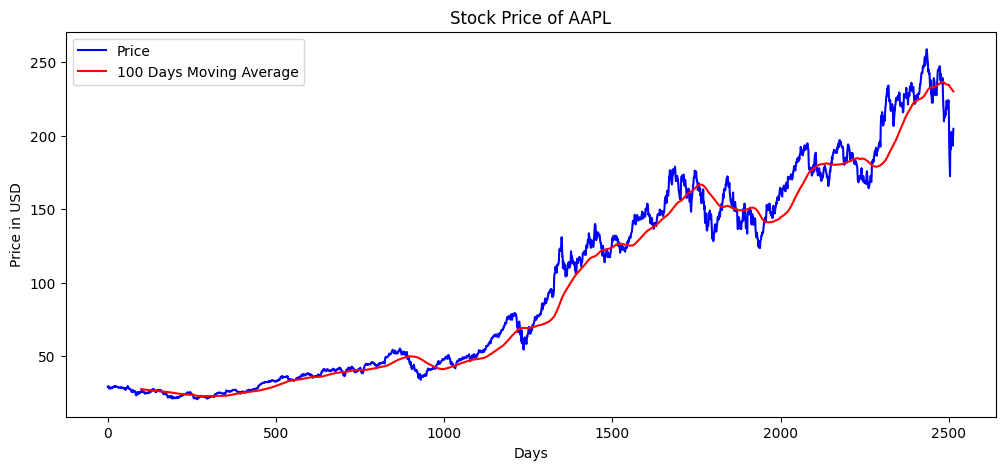

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'],'b',label='Price')
plt.plot(df['MA_100'],'r',label='100 Days Moving Average')
plt.title(f'Stock Price of {ticker}')
plt.legend()
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.show()

### 200 Days Moving Average

In [16]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-04-24,29.095127,29.173293,28.860632,29.142027,178103600,NaN,NaN
1,2015-04-27,29.624407,29.731607,29.289415,29.548476,387816800,NaN,NaN
2,2015-04-28,29.157656,30.046499,28.936564,30.028636,475696000,NaN,NaN
3,2015-04-29,28.728868,29.387684,28.652938,29.068327,253544400,NaN,NaN
4,2015-04-30,27.949457,28.728870,27.822160,28.728870,332781600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-02-05,21.386503,22.046160,21.311440,21.955172,185672400,24.910645,NaN
199,2016-02-08,21.611691,21.768642,21.163579,21.184050,216085600,24.864811,26.227709
200,2016-02-09,21.607149,21.823244,21.366034,21.447922,177324800,24.818639,26.190269


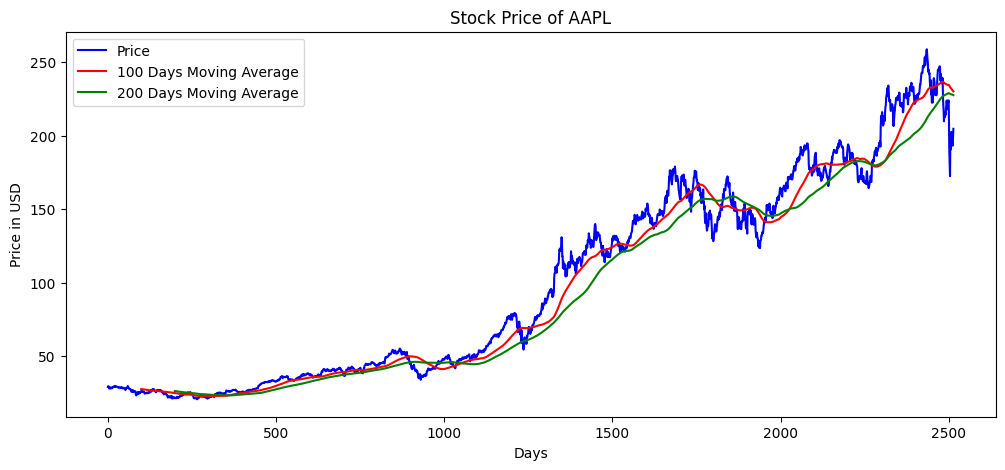

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'],'b',label='Price')
plt.plot(df['MA_100'],'r',label='100 Days Moving Average')
plt.plot(df['MA_200'],'g',label='200 Days Moving Average')
plt.title(f'Stock Price of {ticker}')
plt.legend()
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.show()

### Percent Change in close Price for Each Trading Session

In [18]:
df['Percentage Change']=df.Close.pct_change()
df[['Close','Percentage Change']]

Price,Close,Percentage Change
Ticker,AAPL,
0,29.095127,NaN
1,29.624407,0.018191
2,29.157656,-0.015756
3,28.728868,-0.014706
4,27.949457,-0.027130
...,...,...
2510,194.270004,-0.038933
2511,196.979996,0.013950
2512,193.160004,-0.019393


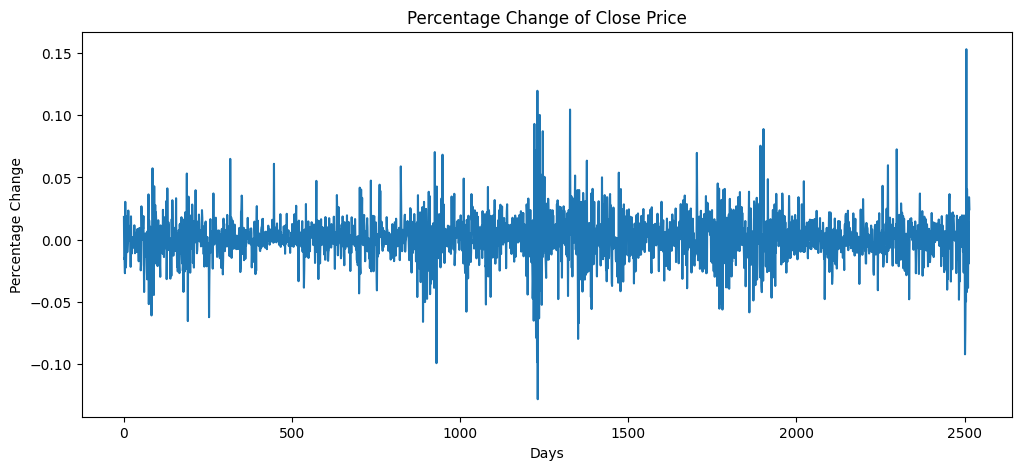

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])
plt.title('Percentage Change of Close Price')
plt.ylabel('Percentage Change')
plt.xlabel('Days')
plt.show();

# 4. Data PreProcessing

In [20]:
df.shape

(2515, 9)

In [23]:
# Splitting Data into Training & Testing DataSets
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):])


In [24]:
data_training

Ticker,AAPL
0,29.095127
1,29.624407
2,29.157656
3,28.728868
4,27.949457
...,...
1755,164.986633
1756,167.682922
1757,162.654388
1758,162.437943


In [25]:
data_testing

Ticker,AAPL
1760,164.563492
1761,163.766418
1762,159.210236
1763,160.282837
1764,154.299820
...,...
2510,194.270004
2511,196.979996
2512,193.160004
2513,199.740005


In [26]:
# Scaling down the data between 0-1

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array=scaler.fit_transform(data_training)
print(f'Type is {type(data_training_array)}')
print(f'Length of Training Data Array {len(data_training_array)}')

Type is <class 'numpy.ndarray'>
Length of Training Data Array 1760


# 5. Sequence Creation

In [29]:
# Since we know that the stock price is time series data and price of next day is dependent on some previous data points hence we create sequnce of chunks
# 100days,next day
# days,next day

In [31]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [32]:
x_train

array([[[0.05322572],
        [0.05657124],
        [0.05362096],
        ...,
        [0.03194709],
        [0.03351339],
        [0.03489461]],

       [[0.05657124],
        [0.05362096],
        [0.05091064],
        ...,
        [0.03351339],
        [0.03489461],
        [0.03507975]],

       [[0.05362096],
        [0.05091064],
        [0.04598406],
        ...,
        [0.03489461],
        [0.03507975],
        [0.03153412]],

       ...,

       [[0.86668612],
        [0.86960603],
        [0.87202902],
        ...,
        [0.90030177],
        [0.912182  ],
        [0.92922497]],

       [[0.86960603],
        [0.87202902],
        [0.87532132],
        ...,
        [0.912182  ],
        [0.92922497],
        [0.89744012]],

       [[0.87202902],
        [0.87532132],
        [0.84345275],
        ...,
        [0.92922497],
        [0.89744012],
        [0.89607199]]])

In [33]:
y_train

array([0.03507975, 0.03153412, 0.03086489, ..., 0.89744012, 0.89607199,
       0.91056474])

In [34]:
x_train.ndim

3

In [35]:
x_train.shape

(1660, 100, 1)

# 6.Model Building

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.19.0'

In [40]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [43]:
model=Sequential()

model.add(Input(shape=[100,1]))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64,activation='tanh'))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - loss: 0.0414
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 3.8061e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 4.2097e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 4.1763e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 5.0915e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 3.5392e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 3.7218e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 4.8381e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 3.8178e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 3.2895e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 4.1250e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 3.3916e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 3.0469e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 4.5040e-04
Epoc

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [46]:
# Save the trained model
model.save('stock_prediction_model.keras')

# Preparing the Test Data

In [48]:
data_training.tail(100)

Ticker,AAPL
1660,159.155075
1661,154.113297
1662,157.484329
1663,162.457275
1664,161.936401
...,...
1755,164.986633
1756,167.682922
1757,162.654388
1758,162.437943


In [49]:
data_testing

Ticker,AAPL
1760,164.563492
1761,163.766418
1762,159.210236
1763,160.282837
1764,154.299820
...,...
2510,194.270004
2511,196.979996
2512,193.160004
2513,199.740005


In [50]:
past_100_days=data_training.tail(100)
past_100_days

Ticker,AAPL
1660,159.155075
1661,154.113297
1662,157.484329
1663,162.457275
1664,161.936401
...,...
1755,164.986633
1756,167.682922
1757,162.654388
1758,162.437943


In [54]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,159.155075
1,154.113297
2,157.484329
3,162.457275
4,161.936401
...,...
850,194.270004
851,196.979996
852,193.160004
853,199.740005


In [55]:
input_data=scaler.fit_transform(final_df)
input_data

array([[2.63198943e-01],
       [2.25894547e-01],
       [2.50837003e-01],
       [2.87632104e-01],
       [2.83778129e-01],
       [2.76433605e-01],
       [2.62471524e-01],
       [2.87777633e-01],
       [3.30390278e-01],
       [3.58750574e-01],
       [3.54969194e-01],
       [3.90528146e-01],
       [3.63549979e-01],
       [3.53296571e-01],
       [3.89437526e-01],
       [3.38243870e-01],
       [3.30099559e-01],
       [3.19991679e-01],
       [3.43552345e-01],
       [3.62822561e-01],
       [3.67476550e-01],
       [3.96927579e-01],
       [3.89364705e-01],
       [3.90019077e-01],
       [3.81438630e-01],
       [3.76857236e-01],
       [4.09144103e-01],
       [3.92346185e-01],
       [3.57587020e-01],
       [3.36353462e-01],
       [3.37589724e-01],
       [3.37734914e-01],
       [3.58750574e-01],
       [3.62022773e-01],
       [3.37734914e-01],
       [3.44134234e-01],
       [3.20355332e-01],
       [2.94394964e-01],
       [2.81887269e-01],
       [2.66616671e-01],


In [56]:
input_data.shape

(855, 1)

In [58]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [59]:
x_test

array([[[0.26319894],
        [0.22589455],
        [0.250837  ],
        ...,
        [0.28909055],
        [0.28748906],
        [0.30445384]],

       [[0.22589455],
        [0.250837  ],
        [0.2876321 ],
        ...,
        [0.28748906],
        [0.30445384],
        [0.30321612]],

       [[0.250837  ],
        [0.2876321 ],
        [0.28377813],
        ...,
        [0.30445384],
        [0.30321612],
        [0.29731853]],

       ...,

       [[0.77457687],
        [0.78455457],
        [0.80672735],
        ...,
        [0.58124676],
        [0.52301623],
        [0.54306761]],

       [[0.78455457],
        [0.80672735],
        [0.82291346],
        ...,
        [0.52301623],
        [0.54306761],
        [0.51480327]],

       [[0.80672735],
        [0.82291346],
        [0.82195268],
        ...,
        [0.54306761],
        [0.51480327],
        [0.56348907]]])

In [60]:
y_test

array([3.03216115e-01, 2.97318526e-01, 2.63607079e-01, 2.71543315e-01,
       2.27274644e-01, 2.25599876e-01, 2.77076913e-01, 2.33463291e-01,
       2.35720739e-01, 2.46787822e-01, 2.94405916e-01, 2.27056068e-01,
       2.32451928e-01, 1.94388726e-01, 2.12253668e-01, 1.53846679e-01,
       1.25117198e-01, 1.58294625e-01, 1.46846615e-01, 1.73826137e-01,
       1.12429314e-01, 8.71270434e-02, 8.88767772e-02, 1.29127654e-01,
       1.09075262e-01, 1.10241977e-01, 1.34012976e-01, 1.76742699e-01,
       1.70909350e-01, 1.69961549e-01, 1.88190708e-01, 1.45680013e-01,
       1.51221514e-01, 1.69961549e-01, 1.64492530e-01, 1.25700555e-01,
       8.55227256e-02, 4.72410617e-02, 5.36576554e-02, 7.31265766e-02,
       3.39695942e-02, 4.49075189e-02, 7.63350992e-02, 7.25433320e-02,
       9.38352594e-02, 1.18554398e-01, 1.18554398e-01, 8.77831089e-02,
       1.00835436e-01, 8.25331173e-02, 9.86477611e-02, 1.17825060e-01,
       1.27742250e-01, 1.52752785e-01, 1.57784088e-01, 1.41960954e-01,
      

In [61]:
x_test.ndim

3

In [63]:
x_test[0].shape

(100, 1)

In [62]:
y_test.ndim

1

# 9. Model Predictions

In [64]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step


In [65]:
y_predicted

array([[0.30007055],
       [0.3033674 ],
       [0.30342275],
       [0.28882807],
       [0.2796259 ],
       [0.25747293],
       [0.24022552],
       [0.25063145],
       [0.24753301],
       [0.24349006],
       [0.2450673 ],
       [0.2664014 ],
       [0.2582028 ],
       [0.24772911],
       [0.22554155],
       [0.2153282 ],
       [0.19009273],
       [0.16031472],
       [0.15125145],
       [0.1469975 ],
       [0.1553555 ],
       [0.1436502 ],
       [0.12205098],
       [0.10534323],
       [0.10829917],
       [0.10976702],
       [0.11094198],
       [0.11967152],
       [0.14270179],
       [0.16076614],
       [0.17077619],
       [0.1812485 ],
       [0.17215037],
       [0.162452  ],
       [0.16221806],
       [0.16257206],
       [0.14925879],
       [0.12316678],
       [0.09013536],
       [0.06798879],
       [0.06164315],
       [0.05041268],
       [0.04462067],
       [0.05194278],
       [0.06064871],
       [0.07415529],
       [0.09335295],
       [0.108

In [66]:
y_test

array([3.03216115e-01, 2.97318526e-01, 2.63607079e-01, 2.71543315e-01,
       2.27274644e-01, 2.25599876e-01, 2.77076913e-01, 2.33463291e-01,
       2.35720739e-01, 2.46787822e-01, 2.94405916e-01, 2.27056068e-01,
       2.32451928e-01, 1.94388726e-01, 2.12253668e-01, 1.53846679e-01,
       1.25117198e-01, 1.58294625e-01, 1.46846615e-01, 1.73826137e-01,
       1.12429314e-01, 8.71270434e-02, 8.88767772e-02, 1.29127654e-01,
       1.09075262e-01, 1.10241977e-01, 1.34012976e-01, 1.76742699e-01,
       1.70909350e-01, 1.69961549e-01, 1.88190708e-01, 1.45680013e-01,
       1.51221514e-01, 1.69961549e-01, 1.64492530e-01, 1.25700555e-01,
       8.55227256e-02, 4.72410617e-02, 5.36576554e-02, 7.31265766e-02,
       3.39695942e-02, 4.49075189e-02, 7.63350992e-02, 7.25433320e-02,
       9.38352594e-02, 1.18554398e-01, 1.18554398e-01, 8.77831089e-02,
       1.00835436e-01, 8.25331173e-02, 9.86477611e-02, 1.17825060e-01,
       1.27742250e-01, 1.52752785e-01, 1.57784088e-01, 1.41960954e-01,
      

In [67]:
# inverse transform changing the scaled data to original form

In [68]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [69]:
y_predicted

array([164.13835, 164.58394, 164.59142, 162.61891, 161.37521, 158.38118,
       156.05017, 157.45654, 157.03778, 156.49138, 156.70453, 159.58789,
       158.47983, 157.06429, 154.0656 , 152.68523, 149.2746 , 145.25002,
       144.0251 , 143.45016, 144.57977, 142.99777, 140.0786 , 137.8205 ,
       138.22   , 138.41838, 138.57718, 139.75699, 142.86958, 145.31104,
       146.66391, 148.07928, 146.84964, 145.53888, 145.50728, 145.5551 ,
       143.75578, 140.2294 , 135.76512, 132.77196, 131.91432, 130.3965 ,
       129.61371, 130.6033 , 131.77992, 133.60538, 136.19998, 138.2518 ,
       138.05396, 137.77544, 136.68764, 136.38727, 137.24982, 138.64806,
       140.93535, 143.00363, 143.55232, 143.78604, 143.67986, 144.52657,
       145.94887, 145.94237, 146.9333 , 148.59073, 150.71527, 151.74448,
       151.65257, 150.75484, 151.86722, 153.32733, 156.35782, 158.32634,
       158.6638 , 160.84143, 162.49652, 163.25342, 163.24893, 163.03836,
       164.60953, 165.6932 , 167.75221, 169.69102, 

In [70]:
y_test

array([164.56349182, 163.76641846, 159.2102356 , 160.28283691,
       154.29981995, 154.07347107, 161.03071594, 155.13623047,
       155.44132996, 156.93707275, 163.37277222, 154.27027893,
       154.99954224, 149.85520935, 152.2696991 , 144.37585449,
       140.49299622, 144.977005  , 143.42977905, 147.0761261 ,
       138.77819824, 135.35853577, 135.59501648, 141.03501892,
       138.32489014, 138.48257446, 141.69528198, 147.4703064 ,
       146.68191528, 146.55381775, 149.01753235, 143.27210999,
       144.02105713, 146.55381775, 145.81466675, 140.57183838,
       135.14170837, 129.96784973, 130.83506775, 133.46633911,
       128.17417908, 129.65246582, 133.89997864, 133.38751221,
       136.26516724, 139.60601807, 139.60601807, 135.44720459,
       137.21125793, 134.73765564, 136.91558838, 139.50744629,
       140.84777832, 144.22801208, 144.90800476, 142.76947021,
       143.74511719, 143.38049316, 146.31729126, 147.99264526,
       144.93760681, 148.81059265, 150.82099915, 153.09

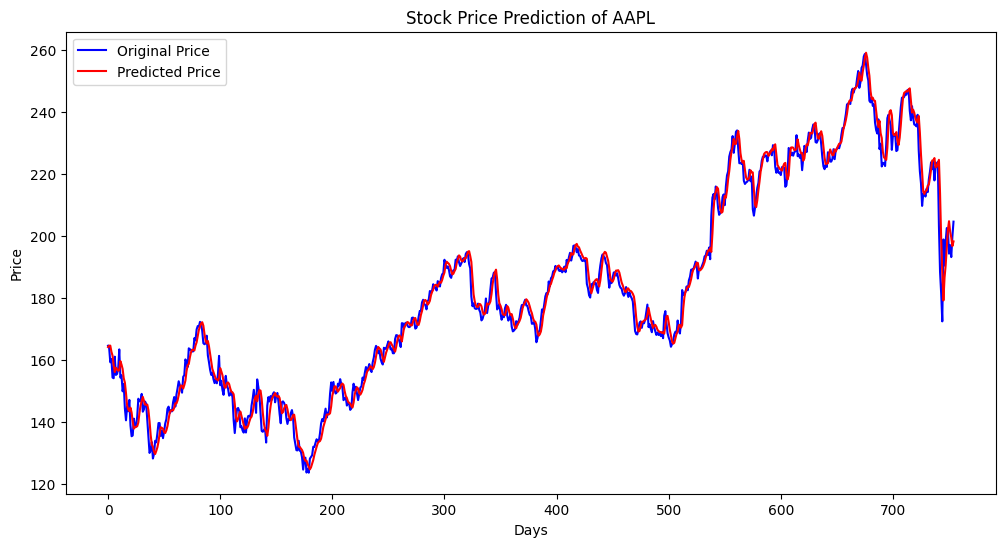

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.title(f'Stock Price Prediction of {ticker}')
plt.ylabel('Price')
plt.legend()
plt.show();

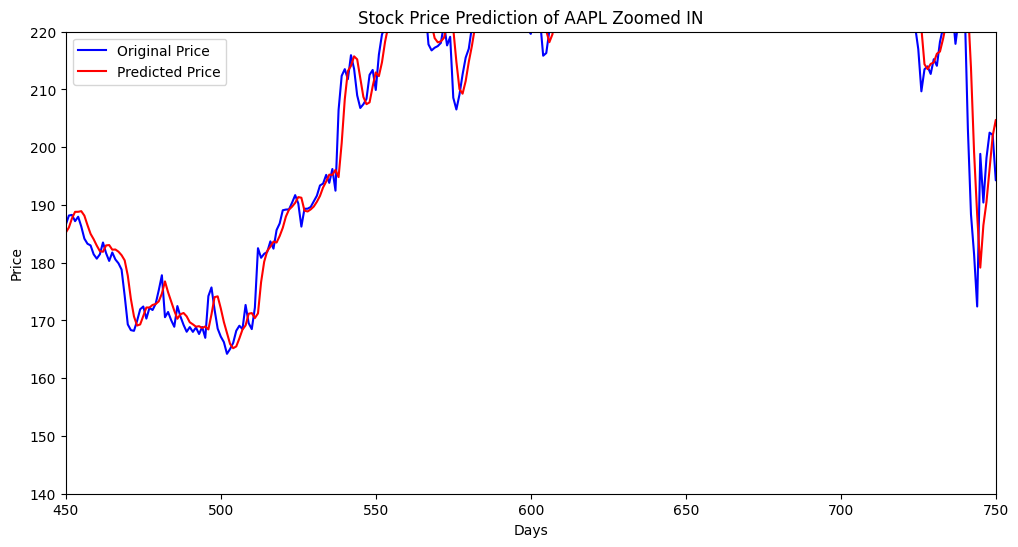

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.title(f'Stock Price Prediction of {ticker} Zoomed IN')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)
plt.show();

# 10. Model Evaluation

In [79]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_predicted)
print(f'Mean Squared Error is {mse}')

Mean Squared Error is 15.162731808930056


In [80]:
# Root Mean Squared Error (RMSE)
rmse=np.sqrt(mse)
print(f'Root Mean Squared  Error {rmse}')

Root Mean Squared  Error 3.893935259981868


In [81]:
# R -Squared
r2=r2_score(y_test,y_predicted)
print(f'R-Squared Error {r2}')

R-Squared Error 0.9859921731307505
